# Compare same model PLIER DelayedPLIER

Milton Pividori (2024)

Compare both models created using the same parameters and SVD instance to assess if delayedPLIER is robust enough for use.

# Load libraries/modules

In [64]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
import seaborn as sns
sns.set_theme()
from pyprojroot import here

# Load data

In [ ]:
# define output nb
output_nb_path = here('output/nbs/compare_same_model_PLIER_DelayedPLIER')
dir.create(output_nb_path, showWarnings = FALSE)

In [67]:
pdata = pd.read_pickle(os.path.join(output_nb_path, "plier_model_Z.pkl"))

In [68]:
pdata.shape

(6683, 1042)

In [69]:
pdata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1033,V1034,V1035,V1036,V1037,V1038,V1039,V1040,V1041,V1042
GAS6,0.000000,0.0,0.808823,0.000000,0.000000,0.022476,0.0,0.0,0.722733,0.000000,...,0.000000,0.012893,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.026791,0.514971
MMP14,0.000000,0.0,0.000000,0.033651,0.046300,0.000000,0.0,0.0,0.631640,0.000000,...,0.000000,0.085061,0.133852,0.00000,0.000000,0.000000,0.0,0.006648,0.000000,0.367395
MARCKSL1,0.016134,0.0,0.000000,0.000000,0.066889,0.066676,0.0,0.0,0.007572,0.000000,...,0.098748,0.000000,0.000000,0.00000,0.006914,0.008059,0.0,0.000000,0.085620,0.239409
SPARC,0.000000,0.0,0.217829,0.058848,0.000000,0.000000,0.0,0.0,0.307728,0.000000,...,0.000000,0.000000,0.000000,0.02233,0.000000,0.000000,0.0,0.094854,0.000000,0.222007
CTSD,0.369515,0.0,0.478988,0.116344,0.000000,0.004502,0.0,0.0,1.338231,0.006039,...,0.000000,0.024049,0.000000,0.00000,0.037192,0.000000,0.0,0.000000,0.000000,0.354017


In [70]:
dpdata = pd.read_pickle(os.path.join(output_nb_path, "delayed_model_Z.pkl"))

In [71]:
dpdata.shape

(6683, 1042)

In [72]:
dpdata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1033,V1034,V1035,V1036,V1037,V1038,V1039,V1040,V1041,V1042
GAS6,0.274305,0.087088,0.675888,0.006886,0.0,0.039737,0.000000,0.148834,0.628300,0.000000,...,0.000000,0.0,0.208160,0.000000,0.000000,0.055585,0.0,0.000000,0.0,0.043891
MMP14,0.000000,0.000000,0.000000,0.059794,0.0,0.000000,0.131966,0.088506,0.792002,0.058473,...,0.000000,0.0,0.000000,0.000000,0.033880,0.053039,0.0,0.000000,0.0,0.000000
MARCKSL1,0.000000,0.000000,0.063092,0.000000,0.0,0.056462,0.000000,0.017353,0.005694,0.000000,...,0.173069,0.0,0.044036,0.004335,0.000000,0.000000,0.0,0.000000,0.0,0.000000
SPARC,0.000000,0.000000,0.633010,0.093929,0.0,0.006519,0.000000,0.015025,0.315341,0.100272,...,0.000000,0.0,0.000000,0.000000,0.107566,0.000000,0.0,0.000000,0.0,0.000000
CTSD,0.026460,0.000000,0.011040,0.095672,0.0,0.000000,0.000000,0.125590,1.510976,0.000000,...,0.000000,0.0,0.000000,0.177919,0.000000,0.000000,0.0,0.155939,0.0,0.000000


In [73]:
assert pdata.shape == dpdata.shape

# First attempt: match one-to-one and correlation

In [74]:
pdata.corrwith(dpdata)

V1       0.148950
V2       0.648023
V3       0.756826
V4       0.989062
V5       0.190025
           ...   
V1038   -0.031792
V1039    0.037048
V1040   -0.022128
V1041    0.003679
V1042   -0.004280
Length: 1042, dtype: float64

**Conclusion:** from these correlation numbers, LVs clearly do not match one to one

# Second attempt: for each LV in model 1, get maximum correlation across all other LVs in model 2

In [75]:
# Compute the cross-correlation matrix
def cross_correlation(df1, df2, method="pearson"):
    if method == "spearman":
        # compute ranks
        df1 = df1.rank(axis=0)
        df2 = df2.rank(axis=0)
    
    # Normalize each DataFrame (subtract mean and divide by std deviation)
    df1_normalized = (df1 - df1.mean()) / df1.std()
    df2_normalized = (df2 - df2.mean()) / df2.std()

    # Calculate the number of observations (rows)
    n = df1.shape[0]

    # Compute the cross-correlation matrix
    cross_corr_matrix = df1_normalized.T.dot(df2_normalized) / (n - 1)

    return cross_corr_matrix

## Using Pearson correlation

Using the Pearson or Spearman correlation compares two LVs across all genes.

In [76]:
# make sure function works
_t0 = cross_correlation(pdata, pdata)
_t1 = pdata.corr()
assert np.allclose(_t0, _t1)

In [77]:
cross_corr_matrix = cross_correlation(pdata, dpdata)

In [78]:
cross_corr_matrix.shape

(1042, 1042)

In [79]:
cross_corr_matrix.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1033,V1034,V1035,V1036,V1037,V1038,V1039,V1040,V1041,V1042
V1,0.148950,0.270502,-0.027990,-0.063496,-0.065776,-0.000765,-0.020561,-0.029413,-0.042208,-0.025807,...,-0.043612,0.229324,-0.046652,-0.032683,-0.030898,-0.112432,0.000987,-0.037014,-0.028734,0.010500
V2,0.135211,0.648023,-0.011659,-0.048547,-0.030490,-0.032201,-0.007345,-0.015361,-0.008110,-0.036478,...,-0.029171,0.184717,-0.027103,-0.018931,-0.015628,-0.066332,0.009294,-0.031943,-0.024563,0.034673
V3,0.038938,-0.017706,0.756826,-0.019897,-0.003200,-0.001671,-0.004201,-0.023034,0.120986,0.092500,...,0.006367,-0.020206,0.012221,-0.002549,0.020443,-0.043552,-0.001988,-0.017841,-0.025450,0.002132
V4,-0.018510,-0.038084,-0.037093,0.989062,-0.050172,0.063255,0.007406,-0.044369,-0.079075,-0.037423,...,-0.048722,-0.066754,-0.054468,-0.022465,-0.044746,-0.026053,-0.033503,0.001845,0.066536,-0.041680
V5,0.031219,-0.008161,0.032191,-0.009774,0.190025,-0.034504,0.025979,-0.018060,-0.022043,-0.021528,...,0.038111,0.001763,-0.003959,0.011827,0.018333,-0.036608,0.066349,-0.035618,0.016066,-0.004545


### Get maximum correlation for each LV in PLIER

In [80]:
plier_lvs_max_corr = cross_corr_matrix.max(axis=1)
display(plier_lvs_max_corr)

V1       0.800810
V2       0.784530
V3       0.756826
V4       0.989062
V5       0.237669
           ...   
V1038    0.534024
V1039    0.970619
V1040    0.669357
V1041    0.385696
V1042    0.691985
Length: 1042, dtype: float64

In [81]:
plier_lvs_max_corr.describe()

count    1042.000000
mean        0.791761
std         0.220381
min         0.154726
25%         0.668056
50%         0.893351
75%         0.967528
max         0.999724
dtype: float64

**Conclusion:** although half of LVs in PLIER have a correlation larger than 0.89 with LVs in DelayedPLIER, it is clear that these two models are not very similar. If they were identical or very similar, the above numbers should all be close to 1.0:

In [82]:
cross_correlation(pdata, pdata).max(axis=1).describe()

count    1.042000e+03
mean     1.000000e+00
std      1.820410e-15
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

Below, I try to identify which LVs are correlated between PLIER and DelayedPLIER:

In [83]:
plier_lvs_max_corr.sort_values()

V871    0.154726
V246    0.185196
V139    0.197328
V446    0.205399
V495    0.206344
          ...   
V30     0.999011
V300    0.999030
V114    0.999109
V233    0.999114
V78     0.999724
Length: 1042, dtype: float64

In [84]:
cross_corr_matrix.loc["V233"].sort_values()

V750   -0.016606
V807   -0.015902
V14    -0.015832
V266   -0.015554
V718   -0.014691
          ...   
V245    0.057421
V264    0.092427
V380    0.135854
V376    0.137726
V363    0.999114
Name: V233, Length: 1042, dtype: float64

LV 233 in PLIER is highly correlated with LV 363 in DelayedPLIER:

In [85]:
pdata["V233"].sort_values(ascending=False).head(20)

AGRP        10.908032
HAP1         0.757771
UTS2         0.664871
CXorf57      0.527378
KCNG2        0.492444
SORCS3       0.460722
GPR19        0.338424
TAC3         0.268444
ACVR1C       0.247449
GNAS         0.238753
ATP6V0D1     0.206364
PTPRN        0.188607
TPST1        0.174565
DGKK         0.173505
BEX1         0.172649
CLDN12       0.166375
SEZ6L        0.152355
MRPL3        0.148206
PNMT         0.146997
CYSLTR2      0.146716
Name: V233, dtype: float64

In [86]:
dpdata["V363"].sort_values(ascending=False).head(20)

AGRP        10.872523
HAP1         0.780336
UTS2         0.665154
CXorf57      0.513684
KCNG2        0.490986
SORCS3       0.456206
GPR19        0.336802
ACVR1C       0.243388
GNAS         0.235159
ATP6V0D1     0.210134
PTPRN        0.197560
CLDN12       0.169535
TPST1        0.168596
PNMT         0.158974
BEX1         0.157883
CYSLTR2      0.151637
MRPL3        0.145453
LAIR2        0.144775
SEZ6L        0.130336
SEMA5A       0.125872
Name: V363, dtype: float64

### Get maximum correlation for each LV in DelayedPLIER

In [87]:
dplier_lvs_max_corr = cross_corr_matrix.max(axis=0)
display(dplier_lvs_max_corr)

V1       0.178645
V2       0.648023
V3       0.756826
V4       0.989062
V5       0.939373
           ...   
V1038    0.919593
V1039    0.328943
V1040    0.971657
V1041    0.860874
V1042    0.446465
Length: 1042, dtype: float64

In [88]:
dplier_lvs_max_corr.describe()

count    1042.000000
mean        0.794169
std         0.217262
min         0.175322
25%         0.669657
50%         0.893351
75%         0.967528
max         0.999724
dtype: float64

## Using Spearman correlation

Spearman correlation is more robust to outliers than Pearson.

In [89]:
# make sure function works
_t0 = cross_correlation(pdata, pdata, method="spearman")
_t1 = pdata.corr(method="spearman")
assert np.allclose(_t0, _t1)

In [90]:
cross_corr_matrix = cross_correlation(pdata, dpdata, method="spearman")

In [91]:
cross_corr_matrix.shape

(1042, 1042)

In [92]:
cross_corr_matrix.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1033,V1034,V1035,V1036,V1037,V1038,V1039,V1040,V1041,V1042
V1,-0.004503,0.161401,0.002249,-0.019206,-0.018495,0.002067,0.023110,0.018488,-0.036745,0.013807,...,-0.012527,0.199719,-0.035263,-0.018246,-0.010466,-0.048147,0.032959,0.031159,0.000743,0.021956
V2,-0.006137,0.354923,0.018460,-0.012629,0.002585,-0.009107,0.008919,0.028449,-0.011501,0.010033,...,0.015850,0.149136,-0.030415,0.008290,-0.020874,-0.012895,0.032956,-0.007356,0.006082,0.039912
V3,0.020450,-0.005046,0.415483,0.067905,-0.015234,0.076079,-0.006457,-0.018222,0.006393,0.014129,...,0.001846,-0.025286,-0.040292,0.009416,0.008850,-0.034614,0.022258,-0.018261,0.011490,-0.034437
V4,0.070880,-0.023769,0.032620,0.877775,0.003818,0.142736,0.028525,-0.030143,-0.027228,0.026724,...,-0.018674,-0.030695,-0.064090,0.041310,-0.036098,0.056770,-0.034272,0.076037,0.094167,-0.011748
V5,-0.018830,0.039537,0.041311,0.036037,0.034567,-0.010288,-0.034050,-0.018750,-0.043726,-0.000795,...,-0.032290,0.005027,-0.034068,-0.011728,0.007317,-0.041316,0.082466,-0.038143,0.009007,-0.000503


### Get maximum correlation for each LV in PLIER

In [93]:
plier_lvs_max_corr = cross_corr_matrix.max(axis=1)
display(plier_lvs_max_corr)

V1       0.583516
V2       0.510528
V3       0.415483
V4       0.877775
V5       0.110478
           ...   
V1038    0.211357
V1039    0.803242
V1040    0.392833
V1041    0.181028
V1042    0.575154
Length: 1042, dtype: float64

In [94]:
plier_lvs_max_corr.describe()

count    1042.000000
mean        0.541417
std         0.206334
min         0.093640
25%         0.381457
50%         0.573717
75%         0.708354
max         0.941832
dtype: float64

### Get maximum correlation for each LV in DelayedPLIER

In [95]:
dplier_lvs_max_corr = cross_corr_matrix.max(axis=0)
display(dplier_lvs_max_corr)

V1       0.143264
V2       0.354923
V3       0.415483
V4       0.877775
V5       0.666783
           ...   
V1038    0.811787
V1039    0.111796
V1040    0.843497
V1041    0.674579
V1042    0.286242
Length: 1042, dtype: float64

In [96]:
dplier_lvs_max_corr.describe()

count    1042.000000
mean        0.542090
std         0.206265
min         0.099629
25%         0.380392
50%         0.578364
75%         0.708354
max         0.941832
dtype: float64

**Conclusion:** from these, it's even more clear that although some LVs are similar across models, the two models as a whole are not very similar.
We should expect more similar outputs from PLIER and DelayedPLIER given the same inputs (I know the SVD matrices are not the same, so that's probably the cause of this mismatch between models).

## Using Jaccard index

Here I do the same analysis, but using the Jaccard index and taking the top 1% of genes for each LV.
The Jaccard index is very simple: it computes the proportion of the top genes that overlap between two LVs.
This is in a way less noisy than using correlation, because it only takes the top genes of the LVs (which are the most important ones).

### Take the top 1% of genes for each LV

In [97]:
pdata_top_genes = pdata.apply(lambda x: x > x.quantile(0.99))

In [98]:
pdata_top_genes

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1033,V1034,V1035,V1036,V1037,V1038,V1039,V1040,V1041,V1042
GAS6,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MMP14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MARCKSL1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SPARC,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CTSD,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VILL,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
VNN3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ZFP36L2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
ZNF135,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
dpdata_top_genes = dpdata.apply(lambda x: x > x.quantile(0.99))

In [100]:
dpdata_top_genes

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1033,V1034,V1035,V1036,V1037,V1038,V1039,V1040,V1041,V1042
GAS6,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MMP14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MARCKSL1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SPARC,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CTSD,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VILL,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
VNN3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
ZFP36L2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ZNF135,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Compute cross-Jaccard matrix

In [101]:
# testing to make sure it's correct
_tmpdf = pd.DataFrame(
    data=1 - pairwise_distances(
        X=pdata_top_genes.iloc[:, :10].T.to_numpy(),
        Y=pdata_top_genes.iloc[:, :10].T.to_numpy(),
        metric="jaccard",
        n_jobs=1
    ),
    index=pdata_top_genes.columns.tolist()[:10],
    columns=dpdata_top_genes.columns.tolist()[:10],
)
_tmp = np.unique(np.diag(_tmpdf))
assert _tmp.shape[0] == 1
assert _tmp[0] == 1.0

assert (_tmpdf.describe().loc["min"] >= 0.0).all()
assert (_tmpdf.describe().loc["max"] <= 1.0).all()

In [102]:
cross_corr_matrix = pd.DataFrame(
    data=1 - pairwise_distances(
        X=pdata_top_genes.T.to_numpy(),
        Y=dpdata_top_genes.T.to_numpy(),
        metric="jaccard",
        n_jobs=1
    ),
    index=pdata_top_genes.columns.tolist(),
    columns=dpdata_top_genes.columns.tolist(),
)

In [103]:
cross_corr_matrix.shape

(1042, 1042)

In [104]:
cross_corr_matrix.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1033,V1034,V1035,V1036,V1037,V1038,V1039,V1040,V1041,V1042
V1,0.080645,0.055118,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.007519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
V2,0.080645,0.264151,0.000000,0.000000,0.007519,0.007519,0.000000,0.0,0.007519,0.000000,...,0.000000,0.038760,0.000000,0.000000,0.000000,0.0,0.007519,0.000000,0.007519,0.000000
V3,0.022901,0.000000,0.456522,0.000000,0.015152,0.000000,0.007519,0.0,0.015152,0.055118,...,0.007519,0.000000,0.015152,0.015152,0.015152,0.0,0.000000,0.000000,0.000000,0.007519
V4,0.000000,0.000000,0.000000,0.914286,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
V5,0.038760,0.000000,0.015152,0.000000,0.080645,0.000000,0.022901,0.0,0.000000,0.007519,...,0.015152,0.007519,0.015152,0.007519,0.015152,0.0,0.046875,0.007519,0.007519,0.007519


### Get maximum Jaccard for each LV in PLIER

In [105]:
plier_lvs_max_corr = cross_corr_matrix.max(axis=1)
display(plier_lvs_max_corr)

V1       0.229358
V2       0.440860
V3       0.456522
V4       0.914286
V5       0.080645
           ...   
V1038    0.218182
V1039    0.763158
V1040    0.252336
V1041    0.107438
V1042    0.229358
Length: 1042, dtype: float64

In [106]:
plier_lvs_max_corr.describe()

count    1042.000000
mean        0.473909
std         0.245056
min         0.046875
25%         0.264151
50%         0.472527
75%         0.675000
max         1.000000
dtype: float64

In [107]:
plier_lvs_max_corr.sort_values().tail(10)

V57     0.942029
V43     0.942029
V73     0.942029
V515    0.970588
V67     0.970588
V127    0.970588
V575    0.970588
V330    1.000000
V30     1.000000
V78     1.000000
dtype: float64

**Conclusion:** the above list does not show LV 233 from PLIER, which was very correlated with LV 363 from DelayedPLIER when using Pearson.
In the above list, we see other LVs more "similar" (according to Jaccard), because they share more genes at the top 1%.

Let's see what happens with LV 233 in PLIER and LV 363 in DelayedPLIER:

In [108]:
cross_corr_matrix.loc["V233"].sort_values()

V1      0.000000
V607    0.000000
V608    0.000000
V610    0.000000
V611    0.000000
          ...   
V329    0.063492
V806    0.072000
V376    0.135593
V380    0.145299
V363    0.810811
Name: V233, Length: 1042, dtype: float64

In [109]:
pdata["V233"].sort_values().tail(67).index.intersection(
    dpdata["V363"].sort_values().tail(67).index
).shape

(60,)

LV 233 and LV 363 share 60 genes out of 67. But LV 78, for example, share all the top 1% genes with LV 78 in DelayedPLIER (so Jaccard is 1.0):

In [110]:
cross_corr_matrix.loc["V78"].sort_values()

V1      0.000000
V590    0.000000
V591    0.000000
V596    0.000000
V598    0.000000
          ...   
V137    0.126050
V39     0.135593
V573    0.145299
V700    0.155172
V78     1.000000
Name: V78, Length: 1042, dtype: float64

In [111]:
pdata["V78"].sort_values().tail(67).index.intersection(
    dpdata["V78"].sort_values().tail(67).index
).shape

(67,)

### Get maximum Jaccard for each LV in DelayedPLIER

In [112]:
dplier_lvs_max_corr = cross_corr_matrix.max(axis=0)
display(dplier_lvs_max_corr)

V1       0.107438
V2       0.264151
V3       0.456522
V4       0.914286
V5       0.696203
           ...   
V1038    0.634146
V1039    0.116667
V1040    0.763158
V1041    0.440860
V1042    0.207207
Length: 1042, dtype: float64

In [113]:
dplier_lvs_max_corr.describe()

count    1042.000000
mean        0.474247
std         0.245202
min         0.055118
25%         0.252336
50%         0.472527
75%         0.675000
max         1.000000
dtype: float64

# How does it look the correlation between LVs in the PLIER model?

This part is just to take a look at the correlation matrix. I'm not comparing the two models here (it's clear they differ).

In [114]:
pdata_corr = pdata.corr(method="spearman")

In [115]:
pdata_corr.shape

(1042, 1042)

In [116]:
pdata_corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1033,V1034,V1035,V1036,V1037,V1038,V1039,V1040,V1041,V1042
V1,1.000000,0.272225,-0.012758,-0.013557,0.004786,0.020785,-0.032529,0.013050,-0.024155,0.018204,...,-0.041736,-0.015689,0.007451,0.000997,-0.008835,0.024227,-0.028037,0.066057,0.011166,-0.005940
V2,0.272225,1.000000,-0.041980,-0.004564,0.012026,-0.024494,0.003799,0.034042,0.002190,-0.013039,...,-0.003933,-0.012684,0.016248,-0.004466,-0.016266,0.021799,-0.021994,0.058727,0.038599,-0.032988
V3,-0.012758,-0.041980,1.000000,0.059463,0.044083,0.063261,-0.044825,0.028361,-0.002931,0.048673,...,0.005547,-0.026784,0.027410,0.014850,-0.026349,0.021322,-0.013814,-0.052624,-0.029169,-0.015626
V4,-0.013557,-0.004564,0.059463,1.000000,0.040494,0.161861,0.057911,0.040206,-0.026888,0.015870,...,-0.037463,0.011882,0.015364,-0.014654,-0.068984,-0.008090,-0.015767,-0.001171,0.040395,0.107701
V5,0.004786,0.012026,0.044083,0.040494,1.000000,-0.014853,0.008356,0.047375,-0.025941,0.009958,...,-0.051764,-0.007045,0.017453,-0.015642,-0.023981,-0.060505,-0.060940,-0.020771,-0.005306,-0.095057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V1038,0.024227,0.021799,0.021322,-0.008090,-0.060505,0.061520,-0.045001,-0.012405,-0.008921,0.049808,...,0.137442,0.002319,0.033858,-0.049235,-0.025256,1.000000,0.123512,0.137196,0.119306,0.098460
V1039,-0.028037,-0.021994,-0.013814,-0.015767,-0.060940,0.029962,-0.037089,0.006635,-0.022923,-0.005522,...,0.166080,-0.014719,-0.004180,-0.011015,0.031554,0.123512,1.000000,0.072250,0.102843,0.122228
V1040,0.066057,0.058727,-0.052624,-0.001171,-0.020771,0.000600,-0.050882,-0.041518,-0.057351,-0.007411,...,0.074204,-0.066348,0.076971,-0.009863,-0.013695,0.137196,0.072250,1.000000,0.066751,0.079773
V1041,0.011166,0.038599,-0.029169,0.040395,-0.005306,0.075509,-0.013946,0.031278,-0.018179,0.005662,...,0.091464,-0.027090,0.043962,-0.064202,0.010497,0.119306,0.102843,0.066751,1.000000,0.118902


/home/msubirana/miniconda3/envs/gtex/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/msubirana/miniconda3/envs/gtex/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


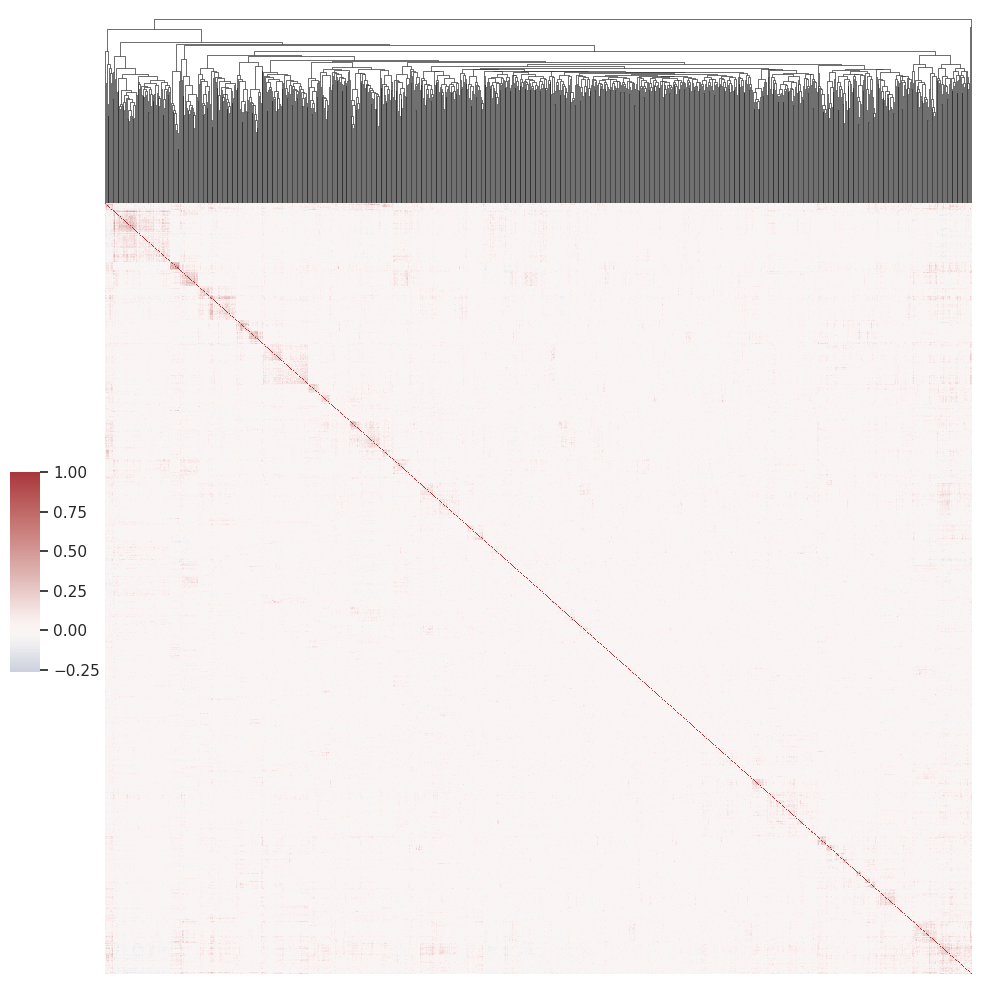

In [117]:
# taken from here: https://seaborn.pydata.org/examples/structured_heatmap.html
g = sns.clustermap(
    pdata_corr,
    center=0,
    cmap="vlag",
    # row_colors=network_colors,
    # col_colors=network_colors,
    dendrogram_ratio=(.1, .2),
    cbar_pos=(.02, .32, .03, .2),
    # linewidths=.75, figsize=(12, 13)
    yticklabels=False,
    xticklabels=False,
)

g.ax_row_dendrogram.remove()